## 2. Importación de las librerías necesarias

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 3. Generación de los datos

Para esta práctica se utilizarán conjuntos de datos sintéticos que se generarán con la función
make_blobs del paquete datasets de sklearn.

El conjunto de datos generado será uno biclásico bidimensional con 15 muestras por clase. El conjunto de datos será dividido en subconjuntos de entrenamiento y test.

In [44]:
X, y = make_blobs(n_samples=[15, 15], n_features=2)
print(X)
print(y)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7)
Xtrain = pd.DataFrame(Xtrain)
Xtest = pd.DataFrame(Xtest)

[[ -8.51333802   4.8211751 ]
 [ -7.62353726   3.52945902]
 [ -8.32094786   7.33633688]
 [ -1.9430089    3.57716252]
 [ -7.0500227    5.00514851]
 [ -7.2745554    3.63325803]
 [ -2.26836135   2.53377624]
 [ -2.40806597   2.87369754]
 [ -8.38447154   4.22026484]
 [ -1.37086535   3.69509472]
 [ -1.65189996   2.43330844]
 [ -2.44972238   2.9276355 ]
 [ -2.26635936   1.56177939]
 [ -3.78142616   4.19631908]
 [ -2.92382305   4.81175077]
 [ -8.2369095    5.21323317]
 [ -6.10376098   2.95593947]
 [ -9.34124179   4.87976432]
 [-10.61041972   5.83225189]
 [ -3.88691979   4.40727359]
 [ -8.13644502   4.60488414]
 [ -8.36327587   4.8795077 ]
 [ -7.7708744    5.3327117 ]
 [ -4.45124344   2.33698714]
 [ -3.18337748   4.84845249]
 [ -2.39247059   4.36226647]
 [ -1.45223554   5.36430918]
 [ -9.79136369   4.51881693]
 [ -8.8178153    3.82945595]
 [ -4.49696588   4.333518  ]]
[0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1]


## 4. Obtención de superficies de decisión con Perceptron

Usando el conjunto de entrenamiento, se entrenará un modelo clasificador usando la clase Perceptron y se obtendrá una gráfica con las muestras usadas y la superficie de decisión.

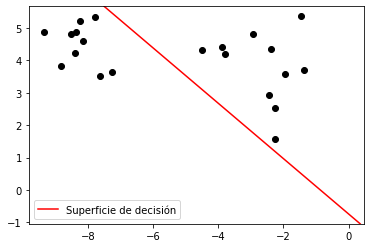

In [45]:
model = Perceptron().fit(X=Xtrain, y=np.reshape(np.array(ytrain), (1,-1))[0])
w1 = model.coef_[0][0]
w2 = model.coef_[0][1]
b = model.intercept_[0]
fig, axs = plt.subplots()
axs.scatter(Xtrain[0], Xtrain[1], color='black')
axs.axline((0, -b/w2), slope=(-(b/w2)/(b/w1)), color='r', label='Superficie de decisión')
axs.legend()
plt.show()

Observamos que la superficie de decisión obtenida separa correctamente las muestras del conjunto de entrenamiento.

Además, obtenemos el valor de la función discriminante y la clase predicha para cada muestra del conjunto de test y comparamos con su verdadera clase.

In [46]:
preds = model.decision_function(Xtest)
pd.DataFrame({"función discriminante": preds, "pred": [0 if pred<0 else 1 for pred in preds], "true": ytest})

,función discriminante,pred,true
0,-33.622796,0,0
1,16.823024,1,1
2,-7.864821,0,1
3,19.048866,1,1
4,-26.987974,0,0
5,31.014250,1,1
6,-3.027254,0,0
7,-16.443745,0,0
8,10.438224,1,0


Apreciamos que todas las muestras fueron correctamente clasificadas, ya que el valor de la función discriminante es negativo en las muestras de la clase 0 y positivo en las de la clase 1.

A continuación, repetimos el mismo procedimiento, pero esta vez para un problema triclásico con 10 muestras por clase. Del mismo modo, obtenemos una gráfica con las muestras de entrenamiento y las tres superficies de decisión.

In [47]:
X, y = make_blobs(n_samples=[10, 10, 10], n_features=2)
print(X)
print(y)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7)
Xtrain = pd.DataFrame(Xtrain)
Xtest = pd.DataFrame(Xtest)

[[ 8.64508205 -7.29646349]
 [10.18711136 -5.42797768]
 [-0.55858894 -4.30363305]
 [-0.96219965 -5.71406964]
 [-0.48081249  3.68647833]
 [ 0.3348385   4.90580406]
 [ 1.96143165  4.78477027]
 [ 0.05959938  6.62914211]
 [ 0.77781104  5.14589651]
 [ 9.80169885 -6.65763002]
 [ 1.05173797  7.15766476]
 [-0.29422027 -6.68879684]
 [ 8.63743601 -5.77998571]
 [-0.31115885 -6.9348703 ]
 [-0.9561626   4.99842602]
 [ 1.89445562  4.18674386]
 [ 9.12768837 -6.84779331]
 [-1.03980316 -7.44381785]
 [10.34237397 -5.59073431]
 [ 0.52719772  6.5377994 ]
 [ 7.8750426  -7.52725296]
 [ 9.06107276 -7.00449512]
 [-1.20892805 -6.75013706]
 [ 8.39051366 -6.56388885]
 [-1.76061034 -5.98039426]
 [-0.02718415 -5.79660247]
 [-0.83597481 -6.03377209]
 [ 6.4299211  -5.11084295]
 [-0.2643743  -6.36167075]
 [ 0.89483939  6.91919838]]
[0 0 1 1 2 2 2 2 2 0 2 1 0 1 2 2 0 1 0 2 0 0 1 0 1 1 1 0 1 2]


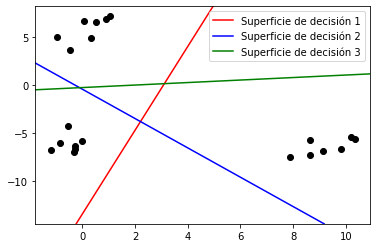

In [48]:
model = Perceptron().fit(X=Xtrain, y=np.reshape(np.array(ytrain), (1,-1))[0])
w11 = model.coef_[0][0]
w21 = model.coef_[0][1]
w12 = model.coef_[1][0]
w22 = model.coef_[1][1]
w13 = model.coef_[2][0]
w23 = model.coef_[2][1]
b1 = model.intercept_[0]
b2 = model.intercept_[1]
b3 = model.intercept_[2]
fig, axs = plt.subplots()
axs.scatter(Xtrain[0], Xtrain[1], color='black')
axs.axline((0, -b1/w21), slope=(-(b1/w21)/(b1/w11)), color='r', label='Superficie de decisión 1')
axs.axline((0, -b2/w22), slope=(-(b2/w22)/(b2/w12)), color='b', label='Superficie de decisión 2')
axs.axline((0, -b3/w23), slope=(-(b3/w23)/(b3/w13)), color='g', label='Superficie de decisión 3')
axs.legend()
plt.show()

De nuevo, observamos que las muestras de entrenamiento son correctamente clasificadas.

Igualmente, obtenemos en este caso los valores de las tres funciones discriminantes y la predicción de la clase a la que pertenece cada muestra.

In [49]:
preds = model.decision_function(Xtest).tolist()
pd.DataFrame({"función discriminante 0": [pred[0] for pred in preds],
              "función discriminante 1": [pred[1] for pred in preds],
              "función discriminante 2": [pred[2] for pred in preds],
              "pred": [pred.index(max(pred)) for pred in preds], "true": ytest})

,función discriminante 0,función discriminante 1,función discriminante 2,pred,true
0,-3.134217,57.774819,-25.941523,1,1
1,-2.786133,-50.648980,15.523463,2,2
2,9.853123,-49.045137,-29.178596,0,0
3,-4.521894,-45.620161,19.596255,2,2
4,5.872231,-34.730535,-20.932598,0,0
5,8.851081,-45.114437,-27.231898,0,0
6,-3.548416,45.338904,-19.602156,1,1
7,-4.506032,55.340574,-20.200070,1,1
8,-2.877196,-55.361263,17.695871,2,2


Otra vez, todas las muestras de test fueron correctamente clasificadas. Lo podemos observar fijándonos en que la función discriminante que tiene valor positivo es la que indica a qué clase pertenece la muestra.

## 5. Implementación del método Perceptron

In [50]:
class Perceptron:
    """
    Clase que cuenta con dos métodos para entrenar un perceptrón y obtener predicciones.

    Atributos:
        pesos_ (array): vector de los pesos de las características del modelo entrenado (w).
        intercept_ (float): valor del término independiente (w0).
        max_iter (int): número máximo de iteraciones del proceso de entrenamiento.
        mezclar (bool): booleano que indica si las muestras se mezclan entre cada iteración o no.
        eta0 (float): la fracción de la muestra mal clasificada por la que se actualiza el vector de pesos.
        semilla (int): número que indica el valor de la semilla en caso de mezclar aleatoriamente las muestras.
    """
    def __init__(self, max_iter=1000, mezclar=True, eta0=1.0, semilla=0):
        """
        Función constructora de la clase.
        """

        assert type(max_iter) == int and max_iter > 0, "max_iter debe ser un entero mayor que 0."
        assert type(mezclar) == bool, "mezclar debe ser de tipo booleano."
        assert type(eta0) == int or type(eta0) == float, "eta0 debe ser un número real."
        assert semilla is None or type(semilla) == int, "Si mezclar es True, semilla debe ser un entero."
        self.pesos_ = None
        self.intercept_ = None
        self.max_iter = max_iter
        self.mezclar = mezclar
        self.eta0 = eta0
        self.semilla = semilla

    def fit(self, X, y):
        """
        Función que entrena un modelo de perceptrón.

        :param X: (ndarray) numpy array bidimensional que contiene las características de las muestras a clasificar.
        :param y: (array-like) iterable unidimensional que contiene la clase a la que pertenece cada muestra X.
        :return: (Perceptron) devuelve una instancia de la clase Perceptron con los pesos correspondientes al modelo entrenado.
        """

        assert type(X).__module__ == "numpy", "El argumento X debe ser un numpy array."
        assert len(X) > 0, "El argumento X debe tener como mínimo 1 muestra."
        assert all([len(x) > 0 for x in X]), "Las muestras deben tener una característica como mínimo."
        assert len(X) == len(y), "X e y deben tener la misma cantidad de muestras."

        if self.semilla is not None:
            np.random.seed(self.semilla)
        self.pesos_ = np.array([0] * len(X[0]))
        self.intercept_ = 0

        for _ in range(self.max_iter):
            xcount = 0  # contador del número de muestras que son correctamente clasificadas
            for i in range(len(X)):
                f = self.intercept_ + np.dot(self.pesos_, X[i])
                if y[i] == 1 and f < 0:
                    self.intercept_ = self.intercept_ + self.eta0
                    self.pesos_ = [self.pesos_[i2] + self.eta0 * X[i][i2] for i2 in range(len(self.pesos_))]
                elif y[i] == 0 and f >= 0:
                    self.intercept_ = self.intercept_ - self.eta0
                    self.pesos_ = [self.pesos_[i2] - self.eta0 * X[i][i2] for i2 in range(len(self.pesos_))]
                else:
                    xcount += 1
            # si todas las muestras fueron correctamente clasificadas, no se modificó el vector de pesos, por lo que acabamos
            if xcount == len(X):
                break
            if self.mezclar:
                p = np.random.permutation(len(X))
                X = np.array(X)[p].tolist()
                y = np.array(y)[p].tolist()

        return self

    def predict(self, X):
        """
        Función que predice a qué clase pertenecen las muestras X pasadas.

        :param X: (ndarray) numpy array bidimensional que contiene las características de las muestras a clasificar.
        :return: (list) lista unidimensional que contiene las clases de las predicciones.
        """

        assert type(X).__module__ == "numpy", "El argumento X debe ser un numpy array."
        assert len(X) > 0, "El argumento X debe tener como mínimo 1 muestra."
        assert all([len(x) > 0 for x in X]), "Las muestras deben tener una característica como mínimo."

        preds = []
        for i in range(len(X)):
            f = self.intercept_ + np.dot(self.pesos_, X[i])
            preds.append(f)
        preds = [0 if pred < 0 else 1 for pred in preds]
        return preds

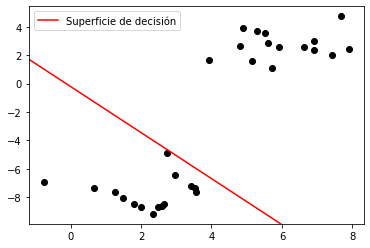

In [51]:
X, y = make_blobs(n_samples=[15, 15], n_features=2)
y = np.reshape(np.array(y), (1,-1))[0]
model = Perceptron(max_iter=10000, mezclar=True, eta0=1.0, semilla=None).fit(X, y)

w1 = model.pesos_[0]
w2 = model.pesos_[1]
b = model.intercept_
fig, axs = plt.subplots()
x = pd.DataFrame(X)
axs.scatter(x[0], x[1], color='black')
axs.axline((0, -b / w2), slope=(-(b / w2) / (b / w1)), color='r', label='Superficie de decisión')
axs.legend()
plt.show()

In [52]:
pd.DataFrame({"pred": model.predict(X), "true": y})

,pred,true
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,1,1
7,1,1
8,1,1
9,1,1


Observamos tanto en la gráfica como en la tabla de predicciones que todas las muestras fueron correctamente clasificadas.

## 6. Ejemplos de uso

Veremos distintos usos de la clase Perceptron usando el mismo conjunto de datos, que será dividido en subconjuntos de entrenamiento y test:

In [53]:
X, y = make_blobs(n_samples=[10, 10], n_features=2)
y = np.reshape(np.array(y), (1,-1))[0]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7)

### 6.1 Entrenamiento con una iteración

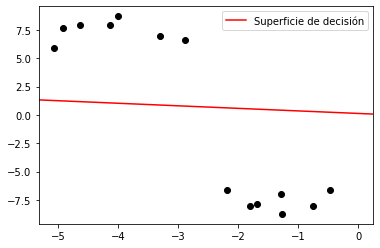

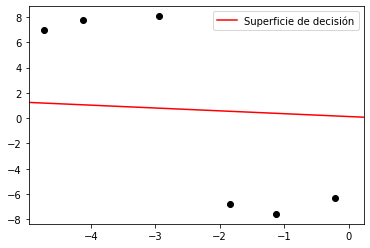

In [54]:
model = Perceptron(max_iter=1, mezclar=True, eta0=1.0, semilla=None).fit(Xtrain, ytrain)

w1 = model.pesos_[0]
w2 = model.pesos_[1]
b = model.intercept_
fig, axs = plt.subplots()
x = pd.DataFrame(Xtrain)
axs.scatter(x[0], x[1], color='black')
axs.axline((0, -b / w2), slope=(-(b / w2) / (b / w1)), color='r', label='Superficie de decisión')
axs.legend()
plt.show()

fig, axs = plt.subplots()
x = pd.DataFrame(Xtest)
axs.scatter(x[0], x[1], color='black')
axs.axline((0, -b / w2), slope=(-(b / w2) / (b / w1)), color='r', label='Superficie de decisión')
axs.legend()
plt.show()

Observamos que con una sola iteración el modelo no es capaz de clasificar correctamente las muestras.

### 6.2 Entrenamiento con y sin mezclar

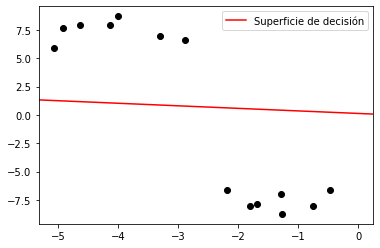

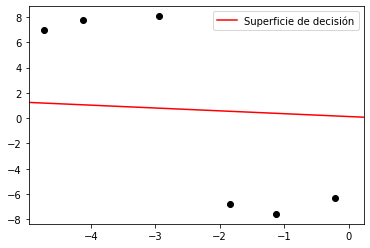

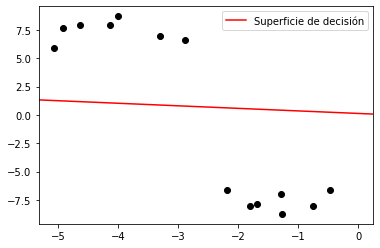

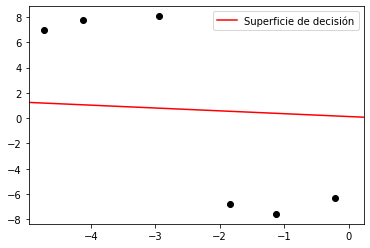

In [55]:
model = Perceptron(max_iter=1000, mezclar=False, eta0=1.0, semilla=None).fit(Xtrain, ytrain)

w1 = model.pesos_[0]
w2 = model.pesos_[1]
b = model.intercept_
fig, axs = plt.subplots()
x = pd.DataFrame(Xtrain)
axs.scatter(x[0], x[1], color='black')
axs.axline((0, -b / w2), slope=(-(b / w2) / (b / w1)), color='r', label='Superficie de decisión')
axs.legend()
plt.show()

fig, axs = plt.subplots()
x = pd.DataFrame(Xtest)
axs.scatter(x[0], x[1], color='black')
axs.axline((0, -b / w2), slope=(-(b / w2) / (b / w1)), color='r', label='Superficie de decisión')
axs.legend()
plt.show()

model = Perceptron(max_iter=1000, mezclar=True, eta0=1.0, semilla=None).fit(Xtrain, ytrain)

w1 = model.pesos_[0]
w2 = model.pesos_[1]
b = model.intercept_
fig, axs = plt.subplots()
x = pd.DataFrame(Xtrain)
axs.scatter(x[0], x[1], color='black')
axs.axline((0, -b / w2), slope=(-(b / w2) / (b / w1)), color='r', label='Superficie de decisión')
axs.legend()
plt.show()

fig, axs = plt.subplots()
x = pd.DataFrame(Xtest)
axs.scatter(x[0], x[1], color='black')
axs.axline((0, -b / w2), slope=(-(b / w2) / (b / w1)), color='r', label='Superficie de decisión')
axs.legend()
plt.show()

Observamos que en ambos casos se obtiene un resultado muy parecido y en ambos parece haber una buena clasificación.

### 6.3 Entrenamiento con mezclar y semilla

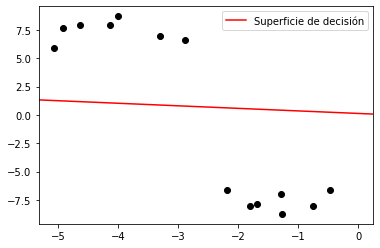

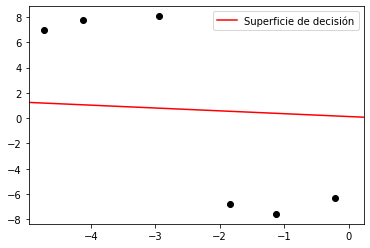

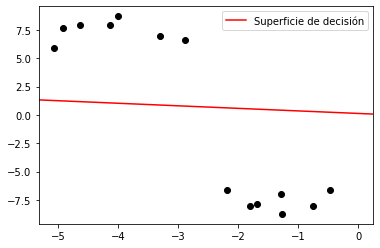

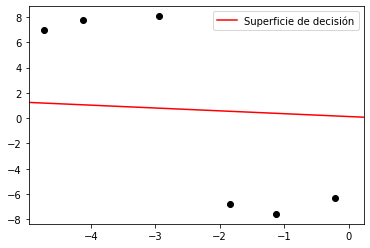

In [56]:
model = Perceptron(max_iter=1000, mezclar=True, eta0=1.0, semilla=12).fit(Xtrain, ytrain)

w1 = model.pesos_[0]
w2 = model.pesos_[1]
b = model.intercept_
fig, axs = plt.subplots()
x = pd.DataFrame(Xtrain)
axs.scatter(x[0], x[1], color='black')
axs.axline((0, -b / w2), slope=(-(b / w2) / (b / w1)), color='r', label='Superficie de decisión')
axs.legend()
plt.show()

fig, axs = plt.subplots()
x = pd.DataFrame(Xtest)
axs.scatter(x[0], x[1], color='black')
axs.axline((0, -b / w2), slope=(-(b / w2) / (b / w1)), color='r', label='Superficie de decisión')
axs.legend()
plt.show()

model = Perceptron(max_iter=1000, mezclar=True, eta0=1.0, semilla=12).fit(Xtrain, ytrain)

w1 = model.pesos_[0]
w2 = model.pesos_[1]
b = model.intercept_
fig, axs = plt.subplots()
x = pd.DataFrame(Xtrain)
axs.scatter(x[0], x[1], color='black')
axs.axline((0, -b / w2), slope=(-(b / w2) / (b / w1)), color='r', label='Superficie de decisión')
axs.legend()
plt.show()

fig, axs = plt.subplots()
x = pd.DataFrame(Xtest)
axs.scatter(x[0], x[1], color='black')
axs.axline((0, -b / w2), slope=(-(b / w2) / (b / w1)), color='r', label='Superficie de decisión')
axs.legend()
plt.show()

Finalmente, observamos que realizando el entrenamiento dos veces mezclando aleatoriamente las muestras después de cada iteración obtenemos exactamente el mismo resultado ya que usamos la misma semilla para mezclar las muestras.